In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

## Loading the Data

In [2]:
import os

In [3]:
flavors = pd.DataFrame(
    columns=['flavor', 'cpu', 'mem'],
    data={
      'flavor': pd.Series(range(1, 16)),
      'cpu': pd.Series([
          1, 1, 1, 2, 2, 2, 4, 4,
          4, 8, 8, 8, 16, 16, 16,
      ]),
      'mem': pd.Series([
          1024, 2048, 4096, 2048, 4096, 8192, 4096, 8192,
          16384, 8192, 16384, 32768, 16384, 32768, 65536,
      ]),
    },
)
flavors

,flavor,cpu,mem
0,1,1,1024
1,2,1,2048
2,3,1,4096
3,4,2,2048
4,5,2,4096
5,6,2,8192
6,7,4,4096
7,8,4,8192
8,9,4,16384
9,10,8,8192


In [4]:
def is_txt(file):
    return os.path.splitext(file)[1] == '.txt'
def join(dir):
    def join_dir(file): return os.path.join(dir, file)
    return join_dir
def read_table(file):
    return pd.read_table(
        file,
        sep='\s+',
        header=None,
        parse_dates=['date'],
        names=['id', 'flavor', 'date', 'time'],
        converters={'flavor': lambda x: np.uint8(x.lstrip('flavor'))},
    )

In [5]:
records_dir = '../datasets'
records_files = map(join(records_dir), filter(is_txt, os.listdir(records_dir)))
records = pd.concat(map(read_table, records_files), ignore_index=True)
records = records[records.flavor <= 15]
del records['id']
del records['time']
records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3441
Data columns (total 2 columns):
flavor    3222 non-null int64
date      3222 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 75.5 KB


In [6]:
records.head()

,flavor,date
0,15,2015-01-01
1,15,2015-01-01
2,8,2015-01-01
3,2,2015-01-02
4,8,2015-01-02


In [7]:
records_with_cpu_mem = pd.merge(records, flavors, on='flavor', how='left')
records_with_cpu_mem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 4 columns):
flavor    3222 non-null int64
date      3222 non-null datetime64[ns]
cpu       3222 non-null int64
mem       3222 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 125.9 KB


In [8]:
cpu_mem_by_date = records_with_cpu_mem.groupby('date').sum()
del cpu_mem_by_date['flavor']
cpu_mem_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2015-01-01 to 2016-01-31
Data columns (total 2 columns):
cpu    188 non-null int64
mem    188 non-null int64
dtypes: int64(2)
memory usage: 4.4 KB


In [9]:
cpu_mem_by_date.head()

,cpu,mem
date,,
2015-01-01,36,139264
2015-01-02,37,141312
2015-01-03,42,172032
2015-01-05,4,8192
2015-01-06,38,90112


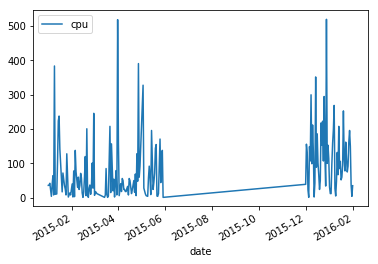

In [10]:
cpu_mem_by_date.plot(y='cpu');

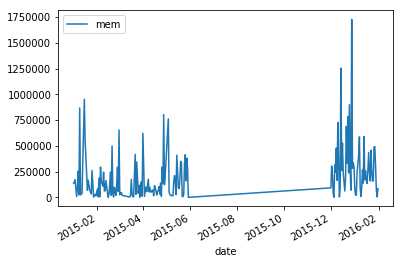

In [11]:
cpu_mem_by_date.plot(y='mem');